#**Importe de Librerias**

In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt



---



#**Temperature Profile**

En el estado inicial, el perfil de distribución de la temperatura a lo largo de la barra sigue un comportamiento lineal. El extremo en $x=0$ se encuentra conectado a un reservorio de alta temperatura $T_0$, mientras que el extremo en $x=L$ se encuentra conectado a un reservorio de baja temperatura $T_L$.

$$T(x)=T_0 + \frac{T_L-T_0}{L}x$$

- **a).** Si se desconectan ambos extremos de la barra y es aislada termicamente, al alcanzar el estado final de equilibrio la temperatura en cada uno de los puntos de la barra resulta

  $$T_f=\frac{T_0+T_L}{2}$$

  En esta situación, el cambio de entropía en el universo resulta

  $$\Delta S=C_P\left[1-\ln{\left(\frac{T_L}{T_f}\right)}+\frac{T_0}{T_0-T_L}\ln{\left(\frac{T_0}{T_L}\right)}\right]$$

- **b).** En el caso en que la barra sigue conectada en un extremo al reservorio de baja temperatura $T_L$, esta resulta la temperatura que alcanza la barra en el estado final de equilibrio.

El cambio en la entropía del universo para esta situación es equivalente a

$$\Delta S=C_P\left[1+\frac{T_0-T_L}{2T_L}-\frac{T_0}{T_0-T_L}\ln{\left(\frac{T_0}{T_L}\right)}\right]$$

In [14]:
# @title
def Tf(T0, TL):

  N = len(T0)
  n = len(TL)
  Tfs = np.zeros((N,n))

  for i in range(N):
    for j in range(n):
      Tfs[i,j] = (T0[i] + TL[j])/2

  return Tfs

##############################################################
def deltaS_a(Cp, T0, TL, Tf):

  N = len(T0)
  n = len(TL)
  dS = np.zeros((N,n))

  for j in range(N):
    for k in range(n):
      dS[j,k] = Cp*(1 - np.log(TL[k]/Tf[j,k]) + (T0[j]*np.log(T0[j]/TL[k])/(T0[j]-TL[k])))

  return dS

###############################################################
def deltaS_b(Cp, T0, TL):
  N = len(T0)
  n = len(TL)
  dS = np.zeros((N,n))

  for j in range(N):
    for k in range(n):
      dS[j,k] = Cp*(1 + ((T0[j]-TL[k])/(2*TL[k])) - (T0[j]*np.log(T0[j]/TL[k])/(T0[j]-TL[k])))

  return dS



---



#**Some Materials**

Se considerarán las siguientes composiciones de la barra, tomando para cada una de ellas una masa $M=1\,kg$ y una longitud $L=1\,m$. El motivo por el que $L$ se establece en un valor invariante se debe a que dicha variable no se encuentra presente en las expresiones de $\Delta S$ y la expresión para $T_f$ solamente involucra a $T_L$, independientemente del valor de $L$.

- **Aluminio**

  $C_P=903\,J/K$

  **Reservorio de Alta Temperatura:** 100°C a 300°C

  **Reservorio de Baja Temperatura:** -50°C a 100°C
- **Cobre**

  $C_P=393\,J/K$

  **Reservorio de Alta Temperatura:** 200°C a 500°C

  **Reservorio de Baja Temperatura:** -50°C a 200°C
- **Hierro**

  $C_P=449\,J/K$

  **Reservorio de Alta Temperatura:** 300°C a 600°C

  **Reservorio de Baja Temperatura:** -50°C a 300°C



In [30]:
# @title
elements = ['Al', 'Cu', 'Fe']

#Valores de Cp
Cp_Al = 903
Cp_Cu = 393
Cp_Fe = 449

#Valores de TL
TL_Al = np.linspace(223.15, 373.15, 20)
TL_Cu = np.linspace(223.15, 473.15, 20)
TL_Fe = np.linspace(223.15, 573.15, 20)

TLs = np.array([TL_Al, TL_Cu, TL_Fe])

#Valores de T0
T0_Al = np.linspace(373.15, 573.15, 5)
T0_Cu = np.linspace(473.15, 773.15, 5)
T0_Fe = np.linspace(573.15, 873.15, 5)

T0s = np.array([T0_Al, T0_Cu, T0_Fe])

#Valores de Tf
Tf_Al = Tf(T0_Al, TL_Al)
Tf_Cu = Tf(T0_Cu, TL_Cu)
Tf_Fe = Tf(T0_Fe, TL_Fe)



---



#**Situación a)**

In [15]:
# @title
dS_Al_a = deltaS_a(Cp_Al, T0_Al, TL_Al, Tf_Al)
dS_Cu_a = deltaS_a(Cp_Cu, T0_Cu, TL_Cu, Tf_Cu)
dS_Fe_a = deltaS_a(Cp_Fe, T0_Fe, TL_Fe, Tf_Fe)

dS_a = np.array([dS_Al_a, dS_Cu_a, dS_Fe_a])

<ipython-input-14-ee18980ddb1f>:22: RuntimeWarning: invalid value encountered in double_scalars
  dS[j,k] = Cp*(1 - np.log(TL[k]/Tf[j,k]) + (T0[j]*np.log(T0[j]/TL[k])/(T0[j]-TL[k])))


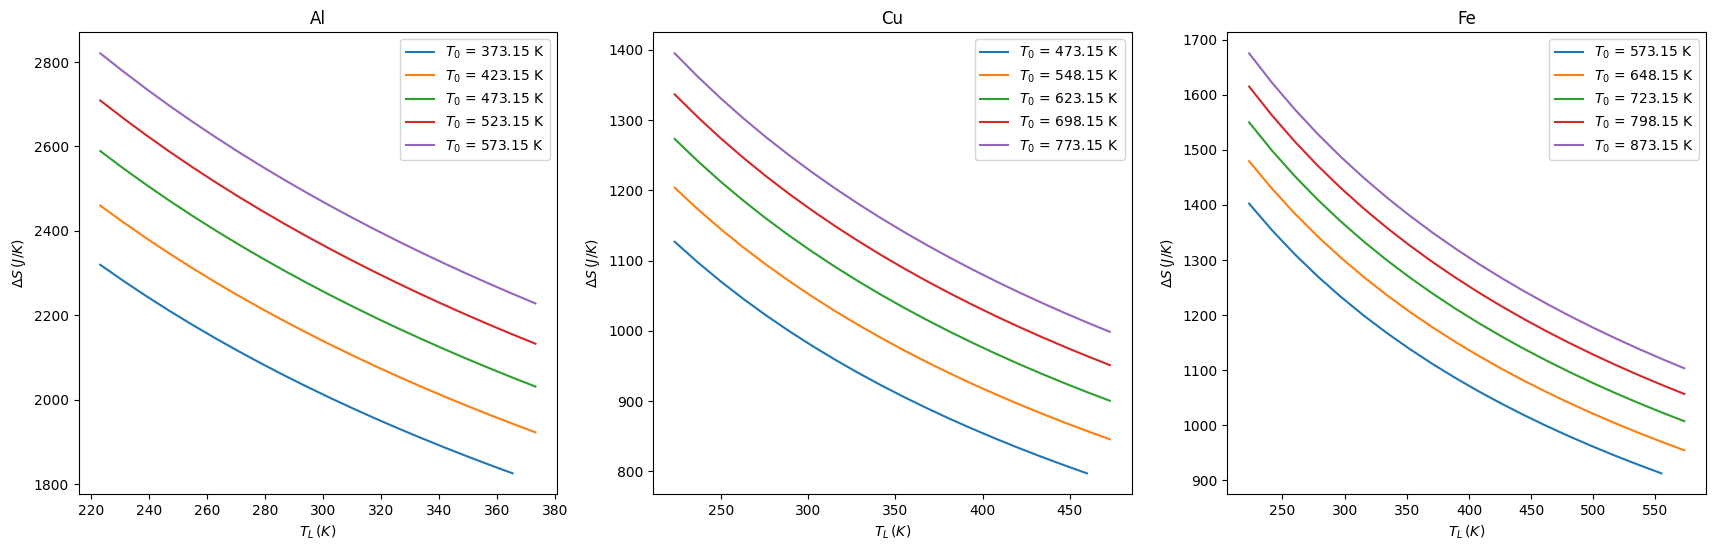

In [31]:
# @title
fig = plt.figure(figsize = (21,6))
for i in range(3):
  fig.add_subplot(1,3,i+1)
  for j in range(5):
    plt.plot(TLs[i], dS_a[i][j], label = f'$T_0$ = {T0s[i][j]} K')
  plt.legend()
  plt.xlabel('$T_L\,(K)$')
  plt.ylabel('$\Delta S\,(J/K)$')
  plt.title(elements[i])



---



#**Situación b)**

In [32]:
# @title
dS_Al_b = deltaS_b(Cp_Al, T0_Al, TL_Al)
dS_Cu_b = deltaS_b(Cp_Cu, T0_Cu, TL_Cu)
dS_Fe_b = deltaS_b(Cp_Fe, T0_Fe, TL_Fe)

dS_b = np.array([dS_Al_b, dS_Cu_b, dS_Fe_b])

<ipython-input-14-ee18980ddb1f>:34: RuntimeWarning: invalid value encountered in double_scalars
  dS[j,k] = Cp*(1 + ((T0[j]-TL[k])/(2*TL[k])) - (T0[j]*np.log(T0[j]/TL[k])/(T0[j]-TL[k])))


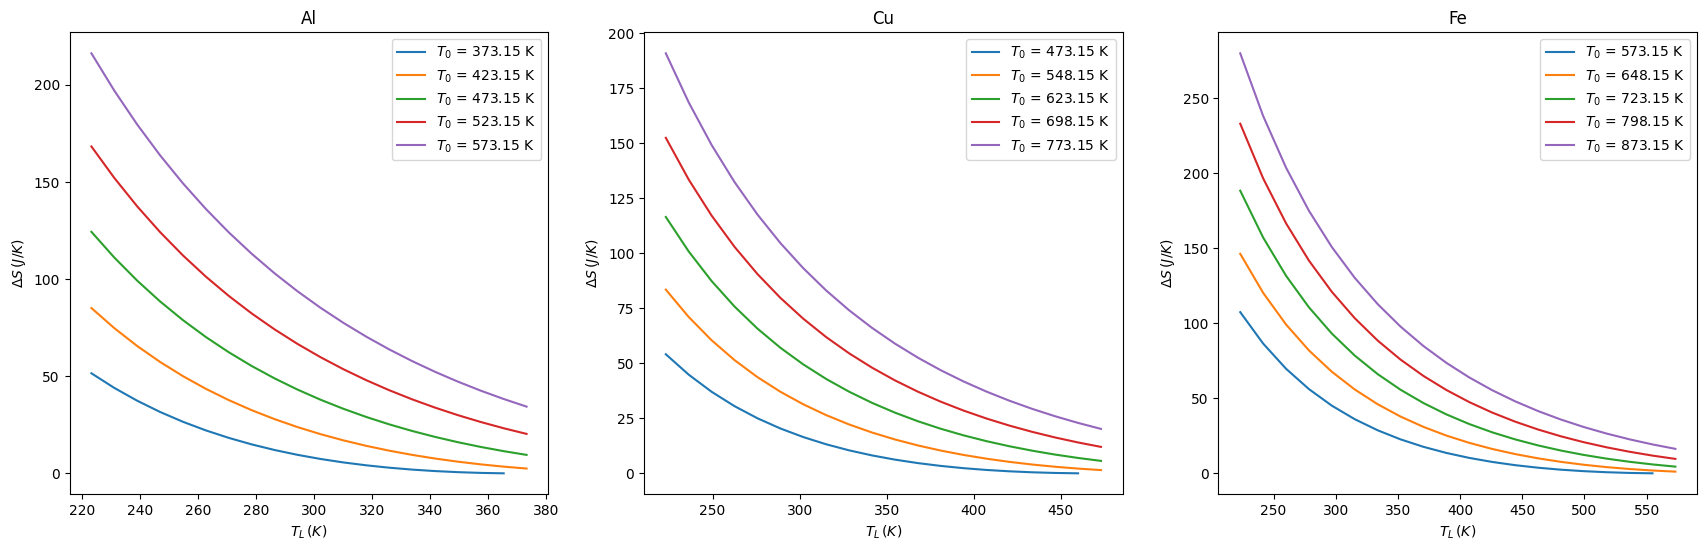

In [33]:
# @title
fig = plt.figure(figsize = (21,6))
for i in range(3):
  fig.add_subplot(1,3,i+1)
  for j in range(5):
    plt.plot(TLs[i], dS_b[i][j], label = f'$T_0$ = {T0s[i][j]} K')
  plt.legend()
  plt.xlabel('$T_L\,(K)$')
  plt.ylabel('$\Delta S\,(J/K)$')
  plt.title(elements[i])



---



#**Discusión**

La importancia del valor de la capacidad calorifica a presión constante $C_P$ radica en su capacidad para describir cómo un material responde a los cambios de temperatura, por lo tanto, un mayor valor de $C_P$ implica que se requiere más energía para cambiar la temperatura del material. La variación de $T_0$ afecta el contenido inicial de energía en la barra, mientras que $T_L$ influye en la interacción con el entorno y la velocidad con la que la barra alcanza la temperatura final. En ambas situaciones, la capacidad térmica y el rango de temperaturas son factores determinantes en los cambios de entropía.


1. **Aluminio:**
   - Debido a su alta capacidad calorifica, el Aluminio puede almacenar y liberar más energía térmica que los otros materiales.
   - En la situación aislada térmicamente, la capacidad de retener energía contribuyó a un cambio más significativo en la entropía, especialmente a temperaturas bajo cero. En general, este material tuvo la variación mayor global de entropía dentro de su rango de temperaturas.
   - En la situación conectada a un extremo al reservorio de baja temperatura, la capacidad de ceder calor al entorno resultó importante y afectó la rapidez con la que la barra alcanzó la temperatura del reservorio. La entropía tuvo variaciones menores que en el caso de aislamiento, y alcanzó valores cercanos a cero en la mayor temperatura $T_L$

2. **Cobre:**
   - Aunque el Cobre tiene un valor de $C_P$ menor que el Aluminio, el rango de temperaturas más amplio contribuyó a un cambio de entropía sustancial. Su capacidad calorifica menor influyó en la transferencia de calor y, por lo tanto, en la rapidez con la que la barra se ajusta a la temperatura del reservorio; por esto resultó el material con el menor rango de cambios de entropía.

3. **Hierro:**
   - Similar al Cobre, en términos de $C_P$, el Hierro tiene la capacidad de almacenar y liberar una cantidad significativa de energía térmica. Al ser un material que permitía mayores rangos de temperaturas en los reservorios, pudo reflejar el mayor cambio de entropía en la situación en la que su extremo seg mantenía conectado.